In [1]:
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
import csv
import time

# gerekli kütüphanelerimiz importladık

In [2]:
for dirname, _, filenames in os.walk(r'C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# dosya dizinimizde neler var ona baktık

C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\BLM 4800 Data Mining Homework 1.docx
C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\DataSetA.csv
C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\DataSetAB.csv
C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\HW1.ipynb
C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\hw1.py
C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\HW2.ipynb
C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\HW2.rar
C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\Untitled.ipynb
C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\WheatCustomerDataSet.csv
C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\.ipynb_checkpoints\HW1-checkpoint.ipynb
C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\.ipynb_checkpoints\HW2-checkpoint.ipynb
C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\.ipynb_checkp

In [3]:
nRowsRead = 'None' # tüm dosyayı okuduk
df1 = pd.read_csv(r'C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\DataSetA.csv', header=None, sep='\t')
df1.dataframeName = 'DataSetA.csv'
nRow, nCol = df1.shape
print(f'{nRow} satir ve {nCol} sutun var')

# delimiter olarak virgül verdiğimizde sorun çıkıyor o yüzden sep ile satır sonundan yeni satıra geçtik

12526 satir ve 1 sutun var


In [4]:
df1.head()

# ilk 5 satıra baktık ve verimizi yorumladık bunları liste haline getirmemiz gerek

,0
0,"Lassi,Coffee Powder,Butter,Yougurt,Ghee,Cheese,"
1,"Ghee,Coffee Powder,"
2,"Lassi,Tea Powder,Butter,Cheese,"
3,"Cheese,Tea Powder,Panner,Coffee Powder,Butter,..."
4,"Cheese,Yougurt,Coffee Powder,Sugar,Butter,Sweet,"


In [5]:
file = open("DataSetA.csv", "r") 
>>> data = list(csv.reader(file, delimiter=","))
>>> file.close()
print(data)

# dosyayı bu haliyle okuduğumuzda satır sonlarındaki virgüller yüzünden bir eleman daha açılıyor

[['Lassi', 'Coffee Powder', 'Butter', 'Yougurt', 'Ghee', 'Cheese', ''], ['Ghee', 'Coffee Powder', ''], ['Lassi', 'Tea Powder', 'Butter', 'Cheese', ''], ['Cheese', 'Tea Powder', 'Panner', 'Coffee Powder', 'Butter', 'Bread', ''], ['Cheese', 'Yougurt', 'Coffee Powder', 'Sugar', 'Butter', 'Sweet', ''], ['Sugar', 'Tea Powder', 'Ghee', 'Sweet', 'Panner', 'Milk', ''], ['Sweet', 'Coffee Powder', ''], ['Butter', 'Ghee', 'Panner', ''], ['Sweet', 'Tea Powder', 'Butter', 'Yougurt', 'Sugar', 'Cheese', ''], ['Panner', 'Ghee', ''], ['Milk', 'Panner', 'Tea Powder', 'Sweet', 'Bread', ''], ['Ghee', 'Coffee Powder', 'Milk', 'Yougurt', 'Lassi', 'Sugar', 'Butter', 'Panner', ''], ['Butter', 'Coffee Powder', 'Panner', 'Sweet', 'Ghee', 'Lassi', ''], ['Bread', 'Lassi', 'Coffee Powder', 'Tea Powder', 'Sweet', 'Ghee', 'Sugar', 'Panner', ''], ['Milk', 'Sweet', 'Butter', 'Sugar', 'Lassi', 'Panner', ''], ['Bread', 'Coffee Powder', 'Tea Powder', ''], ['Butter', 'Ghee', 'Milk', 'Cheese', ''], ['Bread', 'Coffee Powder

In [6]:
file=open(r'C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\DataSetA.csv','r')
target=open(r'C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\Ödevler\DataSetAB.csv','w')
for line in file:
    target.write(line[:-1].rstrip(',') + "\n")

file.close()
target.close()

# satır sonlarındaki virgülleri siliyoruz ve yeni bir dosyaya kaydediyoruz

In [7]:
file = open("DataSetAB.csv", "r")
>>> data = list(csv.reader(file, delimiter=","))
>>> file.close()
print(data)

# yeni dosyamıza bakıyoruz evet istediğimiz formata gelmiş

[['Lassi', 'Coffee Powder', 'Butter', 'Yougurt', 'Ghee', 'Cheese'], ['Ghee', 'Coffee Powder'], ['Lassi', 'Tea Powder', 'Butter', 'Cheese'], ['Cheese', 'Tea Powder', 'Panner', 'Coffee Powder', 'Butter', 'Bread'], ['Cheese', 'Yougurt', 'Coffee Powder', 'Sugar', 'Butter', 'Sweet'], ['Sugar', 'Tea Powder', 'Ghee', 'Sweet', 'Panner', 'Milk'], ['Sweet', 'Coffee Powder'], ['Butter', 'Ghee', 'Panner'], ['Sweet', 'Tea Powder', 'Butter', 'Yougurt', 'Sugar', 'Cheese'], ['Panner', 'Ghee'], ['Milk', 'Panner', 'Tea Powder', 'Sweet', 'Bread'], ['Ghee', 'Coffee Powder', 'Milk', 'Yougurt', 'Lassi', 'Sugar', 'Butter', 'Panner'], ['Butter', 'Coffee Powder', 'Panner', 'Sweet', 'Ghee', 'Lassi'], ['Bread', 'Lassi', 'Coffee Powder', 'Tea Powder', 'Sweet', 'Ghee', 'Sugar', 'Panner'], ['Milk', 'Sweet', 'Butter', 'Sugar', 'Lassi', 'Panner'], ['Bread', 'Coffee Powder', 'Tea Powder'], ['Butter', 'Ghee', 'Milk', 'Cheese'], ['Bread', 'Coffee Powder'], ['Cheese', 'Tea Powder', 'Sweet', 'Lassi', 'Coffee Powder', 'Sug

In [8]:
transactions = data

# şimdi liste haline getirdiğimiz uygun formatı başka bir değişken olan transactions değişkeninde saklıyoruz

In [9]:
# transaction encoder açıyoruz
my_transactionencoder = TransactionEncoder()

# transaction dizisinin elemanlarını kullanarak transaction encoder'ı fitliyoruz 
my_transactionencoder.fit(transactions)

# transaction elemanlarının listesini kodlanmış transaction dizisini çeviriyoruz 
encoded_transactions = my_transactionencoder.transform(transactions)

# sonra bu diziyi dataframe haline getiriyoruz
encoded_transactions_df = pd.DataFrame(encoded_transactions, columns=my_transactionencoder.columns_)

encoded_transactions_df

# true/false olarak ayarlanan attribute'lara baktık

,Bread,Butter,Cheese,Coffee Powder,Ghee,Lassi,Milk,Panner,Sugar,Sweet,Tea Powder,Yougurt
0,False,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,True,True,False,False,False,False,False,False,False
2,False,True,True,False,False,True,False,False,False,False,True,False
3,True,True,True,True,False,False,False,True,False,False,True,False
4,False,True,True,True,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
12521,True,False,True,False,False,False,True,True,True,False,False,False
12522,True,False,True,True,False,False,False,False,True,False,False,False
12523,True,False,True,False,False,False,True,False,False,False,False,True
12524,True,False,True,False,True,False,False,False,True,False,False,True


In [10]:
encoded_transactions_df.head(30)

#ilk 30 satırı kontrol ettik, sıkıntı yok

,Bread,Butter,Cheese,Coffee Powder,Ghee,Lassi,Milk,Panner,Sugar,Sweet,Tea Powder,Yougurt
0,False,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,True,True,False,False,False,False,False,False,False
2,False,True,True,False,False,True,False,False,False,False,True,False
3,True,True,True,True,False,False,False,True,False,False,True,False
4,False,True,True,True,False,False,False,False,True,True,False,True
5,False,False,False,False,True,False,True,True,True,True,True,False
6,False,False,False,True,False,False,False,False,False,True,False,False
7,False,True,False,False,True,False,False,True,False,False,False,False
8,False,True,True,False,False,False,False,False,True,True,True,True
9,False,False,False,False,True,False,False,True,False,False,False,False


In [11]:
# min support 10 aldım, mlxtend için yüzde olarak ifade edilmesi gerektiği için böyle yazdım
min_support = 10/len(transactions) 

# mlxtend'den fpgrowth kullanarak sık kullanılan öğe kümelerini hesaplıyoruz
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
frequent_itemsets = fpgrowth(encoded_transactions_df, min_support=min_support, use_colnames = True)

# öğelere bakalım
frequent_itemsets

,support,itemsets
0,0.439885,(Ghee)
1,0.439805,(Coffee Powder)
2,0.439326,(Yougurt)
3,0.437570,(Butter)
4,0.437171,(Cheese)
...,...,...
3843,0.044947,"(Bread, Yougurt, Sugar, Milk)"
3844,0.021954,"(Bread, Yougurt, Coffee Powder, Sugar, Milk)"
3845,0.021475,"(Bread, Yougurt, Coffee Powder, Sugar, Ghee)"
3846,0.021076,"(Bread, Yougurt, Sugar, Ghee, Milk)"


In [12]:
# Metrikler
# support (ürünlerin birlikte ortaya çıkma sayısı veya yüzdesi)
# confidence (bir kuralın oluşma sayısı, ayrıca sol taraf verildiğinde sağ tarafın koşullu olasılığı)
# lift (ilişkinin gücü)

In [13]:
# ilişkilendirme kurallarını hesaplayıp yazdırıyoruz
# min th 0.7 aldım, hoca istediğiniz değerleri alabilirsiniz demişti
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Bread, Yougurt, Butter, Lassi, Coffee Powder,...",(Sugar),0.001836,0.437650,0.001357,0.739130,1.688863,0.000554,2.155676
1,"(Bread, Yougurt, Butter, Lassi, Sugar, Tea Pow...",(Coffee Powder),0.001517,0.439805,0.001118,0.736842,1.675383,0.000451,2.128740
2,"(Bread, Yougurt, Butter, Sugar, Tea Powder, Sw...",(Coffee Powder),0.001198,0.439805,0.000878,0.733333,1.667405,0.000352,2.100730
3,"(Bread, Yougurt, Cheese, Butter, Panner, Sugar...",(Coffee Powder),0.001357,0.439805,0.000958,0.705882,1.604989,0.000361,1.904662
4,"(Bread, Cheese, Coffee Powder, Panner, Sugar, ...",(Butter),0.001597,0.437570,0.001118,0.700000,1.599745,0.000419,1.874767
5,"(Yougurt, Cheese, Butter, Panner, Sugar, Tea P...",(Coffee Powder),0.001437,0.439805,0.001038,0.722222,1.642141,0.000406,2.016701
6,"(Bread, Cheese, Lassi, Coffee Powder, Panner, ...",(Butter),0.001437,0.437570,0.001038,0.722222,1.650530,0.000409,2.024749


In [14]:
# ilişkilendirme kurallarını hesaplayıp yazdırıyoruz
association_rules(frequent_itemsets, metric="support", min_threshold=0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ghee),(Milk),0.439885,0.441162,0.200463,0.455717,1.032991,0.006402,1.026741
1,(Milk),(Ghee),0.441162,0.439885,0.200463,0.454397,1.032991,0.006402,1.026599
2,(Coffee Powder),(Ghee),0.439805,0.439885,0.205812,0.467962,1.063827,0.012348,1.052772
3,(Ghee),(Coffee Powder),0.439885,0.439805,0.205812,0.467877,1.063827,0.012348,1.052754
4,(Coffee Powder),(Milk),0.439805,0.441162,0.201022,0.457070,1.036059,0.006996,1.029300
5,(Milk),(Coffee Powder),0.441162,0.439805,0.201022,0.455664,1.036059,0.006996,1.029134
6,(Coffee Powder),(Yougurt),0.439805,0.439326,0.203976,0.463787,1.055677,0.010758,1.045617
7,(Yougurt),(Coffee Powder),0.439326,0.439805,0.203976,0.464292,1.055677,0.010758,1.045710
8,(Yougurt),(Milk),0.439326,0.441162,0.200623,0.456660,1.035129,0.006809,1.028523
9,(Milk),(Yougurt),0.441162,0.439326,0.200623,0.454759,1.035129,0.006809,1.028305


In [15]:
# ilişkilendirme kurallarını hesaplayıp yazdırıyoruz
association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Cheese, Butter, Lassi, Coffee Powder, Sugar, ...","(Bread, Milk)",0.008303,0.200942,0.002635,0.317308,1.579101,0.000966,1.170451
1,"(Bread, Milk)","(Cheese, Butter, Lassi, Coffee Powder, Sugar, ...",0.200942,0.008303,0.002635,0.013111,1.579101,0.000966,1.004872
2,"(Bread, Cheese, Butter, Coffee Powder, Panner,...",(Lassi),0.002156,0.433658,0.001437,0.666667,1.537310,0.000502,1.699026
3,"(Bread, Cheese, Butter, Lassi, Coffee Powder, ...","(Panner, Milk)",0.004471,0.198228,0.001437,0.321429,1.621512,0.000551,1.181559
4,"(Bread, Cheese, Butter, Lassi, Coffee Powder, ...","(Panner, Sugar)",0.004790,0.199984,0.001437,0.300000,1.500120,0.000479,1.142880
...,...,...,...,...,...,...,...,...,...
677,"(Ghee, Lassi)","(Bread, Butter, Coffee Powder, Panner, Sugar, ...",0.200463,0.003832,0.001198,0.005974,1.558891,0.000429,1.002155
678,"(Coffee Powder, Ghee)","(Bread, Butter, Lassi, Panner, Sugar, Tea Powd...",0.205812,0.003353,0.001198,0.005818,1.735288,0.000507,1.002480
679,(Ghee),"(Bread, Butter, Lassi, Coffee Powder, Panner, ...",0.439885,0.001756,0.001198,0.002722,1.549992,0.000425,1.000969
680,"(Bread, Yougurt, Butter, Lassi, Panner, Sugar,...",(Coffee Powder),0.001198,0.439805,0.000798,0.666667,1.515823,0.000272,1.680584


In [16]:
from mlxtend.frequent_patterns import apriori

# min support 10 aldım, mlxtend için yüzde olarak ifade edilmesi gerektiği için böyle yazdım
min_support = 10/len(transactions) 

apriori(encoded_transactions_df, min_support=min_support)

,support,itemsets
0,0.437809,(0)
1,0.437570,(1)
2,0.437171,(2)
3,0.439805,(3)
4,0.439885,(4)
...,...,...
3843,0.000798,"(1, 3, 4, 5, 6, 7, 8, 9, 10)"
3844,0.001118,"(1, 3, 4, 5, 6, 7, 8, 10, 11)"
3845,0.000878,"(1, 3, 4, 5, 6, 8, 9, 10, 11)"
3846,0.000798,"(1, 3, 5, 6, 7, 8, 9, 10, 11)"


In [17]:
ap_df = apriori(encoded_transactions_df, min_support=min_support, use_colnames = True)

# apriori yaptığımız dataframe'i başka bir df değişkeninde sakladık sonra aprior işlemlerimizi bu df'de yapacağız

In [18]:
ap_df

# dataframe'a baktık

,support,itemsets
0,0.437809,(Bread)
1,0.437570,(Butter)
2,0.437171,(Cheese)
3,0.439805,(Coffee Powder)
4,0.439885,(Ghee)
...,...,...
3843,0.000798,"(Butter, Lassi, Coffee Powder, Panner, Sugar, ..."
3844,0.001118,"(Yougurt, Butter, Lassi, Coffee Powder, Panner..."
3845,0.000878,"(Yougurt, Butter, Lassi, Coffee Powder, Sugar,..."
3846,0.000798,"(Yougurt, Butter, Lassi, Coffee Powder, Panner..."


In [19]:
association_rules(ap_df, metric="confidence", min_threshold=0.7)
# ilişkilendirme kurallarını hesaplayıp yazdırıyoruz

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Bread, Cheese, Lassi, Coffee Powder, Panner, ...",(Butter),0.001437,0.437570,0.001038,0.722222,1.650530,0.000409,2.024749
1,"(Bread, Cheese, Coffee Powder, Panner, Sugar, ...",(Butter),0.001597,0.437570,0.001118,0.700000,1.599745,0.000419,1.874767
2,"(Bread, Yougurt, Cheese, Butter, Panner, Sugar...",(Coffee Powder),0.001357,0.439805,0.000958,0.705882,1.604989,0.000361,1.904662
3,"(Bread, Yougurt, Butter, Lassi, Coffee Powder,...",(Sugar),0.001836,0.437650,0.001357,0.739130,1.688863,0.000554,2.155676
4,"(Bread, Yougurt, Butter, Lassi, Sugar, Tea Pow...",(Coffee Powder),0.001517,0.439805,0.001118,0.736842,1.675383,0.000451,2.128740
5,"(Bread, Yougurt, Butter, Sugar, Tea Powder, Sw...",(Coffee Powder),0.001198,0.439805,0.000878,0.733333,1.667405,0.000352,2.100730
6,"(Yougurt, Cheese, Butter, Panner, Sugar, Tea P...",(Coffee Powder),0.001437,0.439805,0.001038,0.722222,1.642141,0.000406,2.016701


In [20]:
association_rules(ap_df, metric="support", min_threshold=0.2)
# ilişkilendirme kurallarını hesaplayıp yazdırıyoruz

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Cheese),0.437809,0.437171,0.201980,0.461342,1.055291,0.010582,1.044873
1,(Cheese),(Bread),0.437171,0.437809,0.201980,0.462016,1.055291,0.010582,1.044995
2,(Coffee Powder),(Bread),0.439805,0.437809,0.201820,0.458885,1.048140,0.009269,1.038949
3,(Bread),(Coffee Powder),0.437809,0.439805,0.201820,0.460977,1.048140,0.009269,1.039279
4,(Bread),(Lassi),0.437809,0.433658,0.200064,0.456966,1.053747,0.010204,1.042921
5,(Lassi),(Bread),0.433658,0.437809,0.200064,0.461340,1.053747,0.010204,1.043684
6,(Bread),(Milk),0.437809,0.441162,0.200942,0.458972,1.040369,0.007797,1.032917
7,(Milk),(Bread),0.441162,0.437809,0.200942,0.455483,1.040369,0.007797,1.032458
8,(Bread),(Panner),0.437809,0.434616,0.203577,0.464989,1.069885,0.013298,1.056771
9,(Panner),(Bread),0.434616,0.437809,0.203577,0.468406,1.069885,0.013298,1.057556


In [21]:
association_rules(ap_df, metric="lift", min_threshold=1.5)
# ilişkilendirme kurallarını hesaplayıp yazdırıyoruz

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Cheese, Butter, Lassi, Coffee Powder, Sugar, ...","(Bread, Milk)",0.008303,0.200942,0.002635,0.317308,1.579101,0.000966,1.170451
1,"(Bread, Milk)","(Cheese, Butter, Lassi, Coffee Powder, Sugar, ...",0.200942,0.008303,0.002635,0.013111,1.579101,0.000966,1.004872
2,"(Bread, Butter, Coffee Powder, Panner, Sugar, ...",(Lassi),0.004231,0.433658,0.002794,0.660377,1.522807,0.000959,1.667563
3,"(Bread, Butter, Coffee Powder, Panner, Ghee, M...","(Sugar, Lassi)",0.008862,0.199824,0.002794,0.315315,1.577962,0.001023,1.168678
4,"(Coffee Powder, Panner, Sugar, Ghee, Milk)","(Butter, Bread, Lassi)",0.020038,0.091729,0.002794,0.139442,1.520151,0.000956,1.055444
...,...,...,...,...,...,...,...,...,...
677,"(Yougurt, Cheese, Panner, Sugar, Tea Powder, G...","(Coffee Powder, Butter)",0.003353,0.199745,0.001038,0.309524,1.549598,0.000368,1.158991
678,"(Coffee Powder, Butter)","(Yougurt, Cheese, Panner, Sugar, Tea Powder, G...",0.199745,0.003353,0.001038,0.005196,1.549598,0.000368,1.001852
679,(Coffee Powder),"(Yougurt, Cheese, Butter, Panner, Sugar, Tea P...",0.439805,0.001437,0.001038,0.002360,1.642141,0.000406,1.000925
680,"(Yougurt, Cheese, Butter, Lassi, Panner, Sugar...",(Coffee Powder),0.001277,0.439805,0.000878,0.687500,1.563192,0.000316,1.792623


In [22]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=(10/len(transactions))):
    start_time = 0
    total_execution = 0
    
    if(not rule_type=="fpgrowth"):
        start_time = time.time()
        rule_items = apriori(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Apriori uygulandi!")
        
    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Fp Growth uygulandi!")
    
    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
    
    return rule_items, total_execution

# algoritma gerçekleme hesaplaması fonksiyonu

In [23]:
def compute_association_rule(rule_matrix, metric="lift", min_thresh=1.5):
    rules = association_rules(rule_matrix, 
                              metric=metric, 
                              min_threshold=min_thresh)
    
    return rules

# ilişkilendirme kuralları hesaplama fonksiyonu

In [24]:
def plot_metrics_relationship(rule_matrix, col1, col2):
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1], 
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

# iki metrik arasındaki ilişkiyi çizdirme fonksiyponu

In [25]:
def compare_time_exec(algo1=list, alg2=list):   
    execution_times = [algo1[1], algo2[1]]
    algo_names = (algo1[0], algo2[0])
    y=np.arange(len(algo_names))
    
    plt.bar(y,execution_times,color=['orange', 'blue'])
    plt.xticks(y,algo_names)
    plt.xlabel('Algoritma')
    plt.ylabel('Süre')
    plt.title("Çalışma Zamanı Karşılaştırması")
    plt.show()
    
# çalışma zamanı karşılaştırma fonksiyonu

In [26]:
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(encoded_transactions_df)
print("Fp Growth uygulanmasi: {} saniye surdu".format(fp_growth_exec_time))

# verdiğimiz dataframe ile fp growth yapılması ve kaç saniye sürdüğü

Fp Growth uygulandi!
Fp Growth uygulanmasi: 0.2264256477355957 saniye surdu


In [27]:
apriori_matrix, apriori_exec_time = perform_rule_calculation(encoded_transactions_df, rule_type="apriori")
print("Apriori uygulanmasi: {} saniye surdu".format(apriori_exec_time))

# verdiğimiz dataframe ile apriori yapılması ve kaç saniye sürdüğü

Apriori uygulandi!
Apriori uygulanmasi: 0.2844111919403076 saniye surdu


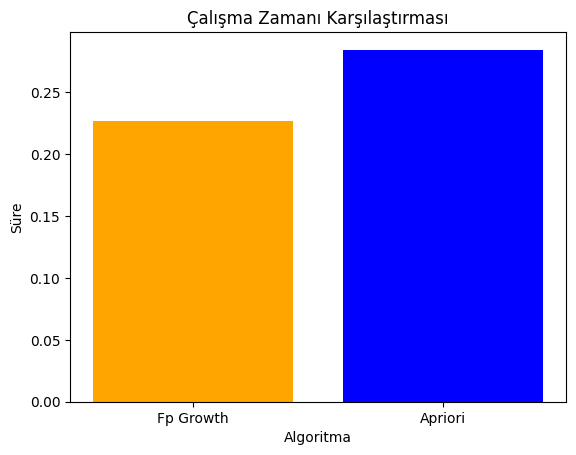

In [28]:
algo1 = ['Fp Growth', fp_growth_exec_time]
algo2 = ['Apriori', apriori_exec_time]

compare_time_exec(algo1, algo2)

# çalışma zamanlarının karşılaştırılması

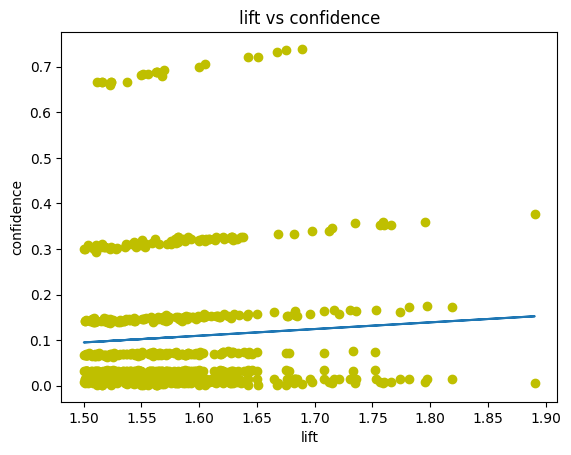

In [29]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')

# fp growth için lift ve confidence arasındaki ilişkinin görselleştirilmesi

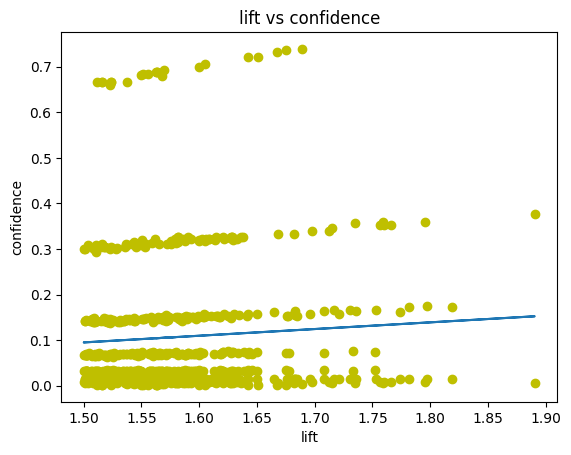

In [30]:
apriori_rule_lift = compute_association_rule(apriori_matrix)
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')

# apriori için lift ve confidence arasındaki ilişkinin görselleştirilmesi

In [31]:
# ECLAT
data = pd.DataFrame(transactions)
data

# eclat için direk transaction'ı dataframe haline getirip alıyoruz

,0,1,2,3,4,5,6,7,8,9,10
0,Lassi,Coffee Powder,Butter,Yougurt,Ghee,Cheese,None,None,None,None,None
1,Ghee,Coffee Powder,None,None,None,None,None,None,None,None,None
2,Lassi,Tea Powder,Butter,Cheese,None,None,None,None,None,None,None
3,Cheese,Tea Powder,Panner,Coffee Powder,Butter,Bread,None,None,None,None,None
4,Cheese,Yougurt,Coffee Powder,Sugar,Butter,Sweet,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
12521,Panner,Sugar,Bread,Milk,Cheese,None,None,None,None,None,None
12522,Sugar,Bread,Coffee Powder,Cheese,None,None,None,None,None,None,None
12523,Bread,Cheese,Yougurt,Milk,None,None,None,None,None,None,None
12524,Ghee,Bread,Yougurt,Sugar,Cheese,None,None,None,None,None,None


In [32]:
# min 2 ürün arasındaki ilişki gelecek
min_n_products = 2

# min support ayarladık
min_support = 10/len(transactions)

# ilişkilendirme kuralları için sınırımız yok
# bu yüzden sonuna kadar aldık
max_length = max([len(x) for x in transactions])

In [33]:
from pyECLAT import ECLAT

# eclat için bir değişken açtık ve dataframe'i verdik
my_eclat = ECLAT(data=data, verbose=True)

# algoritmayı fitledik
rule_indices, rule_supports = my_eclat.fit(min_support=min_support,
                                           min_combination=min_n_products,
                                           max_combination=max_length)

100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1299.44it/s]


Combination 2 by 2


66it [00:00, 284.02it/s]


Combination 3 by 3


220it [00:00, 249.81it/s]


Combination 4 by 4


495it [00:02, 235.56it/s]


Combination 5 by 5


792it [00:03, 222.44it/s]


Combination 6 by 6


924it [00:04, 206.61it/s]


Combination 7 by 7


792it [00:04, 183.78it/s]


Combination 8 by 8


495it [00:02, 171.20it/s]


Combination 9 by 9


220it [00:00, 251.24it/s]


Combination 10 by 10


66it [00:00, 282.77it/s]


Combination 11 by 11


12it [00:00, 250.51it/s]


In [34]:
print(rule_supports)

# min 2 üründen başlayarak ilişkilendirmesi olan toplam ürün sayısına kadar support'ları getirdi

{'Bread & Yougurt': 0.20014370110170845, 'Bread & Cheese': 0.20197988184576082, 'Bread & Butter': 0.1969503432859652, 'Bread & Lassi': 0.20006386715631486, 'Bread & Coffee Powder': 0.20182021395497365, 'Bread & Panner': 0.20357656075363245, 'Bread & Sugar': 0.19790835063068818, 'Bread & Tea Powder': 0.1951939964873064, 'Bread & Sweet': 0.20269838735430304, 'Bread & Ghee': 0.19982436532013412, 'Bread & Milk': 0.20094204055564427, 'Yougurt & Cheese': 0.202139549736548, 'Yougurt & Butter': 0.20190004790036722, 'Yougurt & Lassi': 0.1968705093405716, 'Yougurt & Coffee Powder': 0.20397573048060036, 'Yougurt & Panner': 0.1994251955931662, 'Yougurt & Sugar': 0.20190004790036722, 'Yougurt & Tea Powder': 0.19846718824844323, 'Yougurt & Sweet': 0.19782851668529458, 'Yougurt & Ghee': 0.197748682739901, 'Yougurt & Milk': 0.20062270477406993, 'Cheese & Butter': 0.19838735430304966, 'Cheese & Lassi': 0.1983075203576561, 'Cheese & Coffee Powder': 0.20094204055564427, 'Cheese & Panner': 0.1993453616477

In [35]:
"""
bu aşamadan sonra verinin ve ilişkilerin yorumlanması için elde edilen değerler
sıralanarak aralarındaki ilişkiler yorumlanabilir, sıralarken hangi metriği kullanmak istediğimiz bize kalmış
örneğin istediğimiz bir metrik: 

confidence olsun, büyükten küçüğe sıralanarak bir ürünü alan kişinin
yanındaki 2. ürün veya ürünleri hangi olasılıkla almayı tercih ettiği görülebilir,

supportlarına bakarak bu 2 grubun birlikte görülme olasılıkları değerlendirilebilir,

lift'lere bakarak birinci grubun yer aldığı alışveriş sepetlerinde ikinci grubun satışının ne kadar artığı,

leverage'lara bakarak ilk ve ikinci grubun birlikte satın alınmalarının ile birbirlerinden bağımsız olarak satın alınmalarından 
ne kadar fazla olduğunu,

conviction'a bakarak birbirleri ile ilişkili olma durumları,

yorumlanabilir.
"""



"\nbu aşamadan sonra verinin ve ilişkilerin yorumlanması için elde edilen değerler\nsıralanarak aralarındaki ilişkiler yorumlanabilir, sıralarken hangi metriği kullanmak istediğimiz bize kalmış\nörneğin istediğimiz bir metrik: \n\nconfidence olsun, büyükten küçüğe sıralanarak bir ürünü alan kişinin\nyanındaki 2. ürün veya ürünleri hangi olasılıkla almayı tercih ettiği görülebilir,\n\nsupportlarına bakarak bu 2 grubun birlikte görülme olasılıkları değerlendirilebilir,\n\nlift'lere bakarak birinci grubun yer aldığı alışveriş sepetlerinde ikinci grubun satışının ne kadar artığı,\n\nleverage'lara bakarak ilk ve ikinci grubun birlikte satın alınmalarının ile birbirlerinden bağımsız olarak satın alınmalarından \nne kadar fazla olduğunu,\n\nconviction'a bakarak birbirleri ile ilişkili olma durumları,\n\nyorumlanabilir.\n"